In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
PATH_DATA = '../mydata/'

In [99]:
df = pd.read_csv(PATH_DATA+'food_delivery_datasets.csv')

In [100]:
df

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [101]:
df.info

<bound method DataFrame.info of         order_id  voucher_amount                   date_time  eta_seconds  \
0     FOOD-10455               0  2018-08-12T20:35:08.001006         1800   
1     FOOD-10985               0  2018-09-23T17:44:12.243273         2173   
2     FOOD-10911               0  2018-09-19T18:08:09.387991         1418   
3     FOOD-10932               0  2018-09-21T01:24:35.272499         1903   
4     FOOD-10961               0  2018-09-22T17:57:45.523161         1716   
...          ...             ...                         ...          ...   
1071  FOOD-10921               0  2018-09-20T15:01:52.152828          900   
1072  FOOD-10265            5000  2018-07-26T14:43:23.655294         1579   
1073  FOOD-10534               0  2018-08-21T20:10:59.283185         2606   
1074  FOOD-10158               0  2018-07-16T14:42:23.214427         2428   
1075  FOOD-10770               0  2018-09-11T14:18:19.494258         1547   

      food_price  cust_id  rating  delivery

In [102]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = df['date_time'].dt.strftime('%Y-%m-%d')
df['day'] = df['date_time'].dt.strftime('%A')
df['is_completed'] = (df['status']=='Completed').astype(int)

In [103]:
df

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,date,day,is_completed
0,FOOD-10455,0,2018-08-12 20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,2018-08-12,Sunday,1
1,FOOD-10985,0,2018-09-23 17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,2018-09-23,Sunday,1
2,FOOD-10911,0,2018-09-19 18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,2018-09-19,Wednesday,1
3,FOOD-10932,0,2018-09-21 01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,2018-09-21,Friday,1
4,FOOD-10961,0,2018-09-22 17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,2018-09-22,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20 15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328,2018-09-20,Thursday,1
1072,FOOD-10265,5000,2018-07-26 14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251,2018-07-26,Thursday,1
1073,FOOD-10534,0,2018-08-21 20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528,2018-08-21,Tuesday,1
1074,FOOD-10158,0,2018-07-16 14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946,2018-07-16,Monday,1


In [104]:
x = df[['order_id','status']]

In [105]:
x

,order_id,status
0,FOOD-10455,Completed
1,FOOD-10985,Completed
2,FOOD-10911,Completed
3,FOOD-10932,Completed
4,FOOD-10961,Completed
...,...,...
1071,FOOD-10921,Completed
1072,FOOD-10265,Completed
1073,FOOD-10534,Completed
1074,FOOD-10158,Completed


In [106]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time']

0      2018-08-12 20:35:08.001006
1      2018-09-23 17:44:12.243273
2      2018-09-19 18:08:09.387991
3      2018-09-21 01:24:35.272499
4      2018-09-22 17:57:45.523161
                  ...            
1071   2018-09-20 15:01:52.152828
1072   2018-07-26 14:43:23.655294
1073   2018-08-21 20:10:59.283185
1074   2018-07-16 14:42:23.214427
1075   2018-09-11 14:18:19.494258
Name: date_time, Length: 1076, dtype: datetime64[ns]

In [107]:
y = df['date_time'].dt.strftime('%A')

In [108]:
y

0          Sunday
1          Sunday
2       Wednesday
3          Friday
4        Saturday
          ...    
1071     Thursday
1072     Thursday
1073      Tuesday
1074       Monday
1075      Tuesday
Name: date_time, Length: 1076, dtype: object

In [109]:
group_status = df.groupby('status')
group_status['status'].size()

status
Cancelled    195
Completed    881
Name: status, dtype: int64

In [110]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

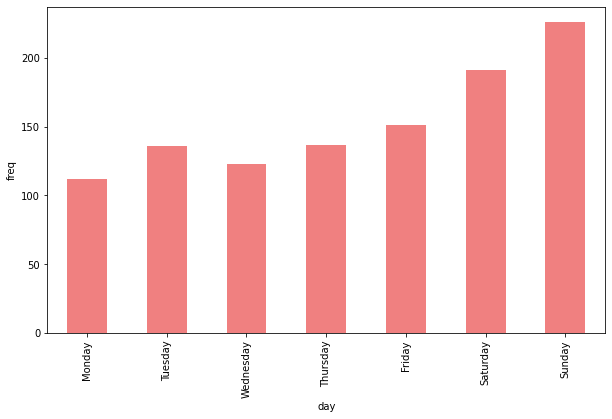

In [145]:
a = df.groupby(['day']).size().reindex(days).plot(kind='bar', color='lightcoral', figsize = (10,6), ylabel='freq')

Berdasarkan hasil diatas diketahui bahwa hari Minggu orderan terbanyak.

In [123]:
#Melihat data berdasarkan date, order id, dan status pemesanan
x = df.groupby(['date','day','status']).order_id.size().reset_index()

In [124]:
x

,date,day,status,order_id
0,2018-07-01,Sunday,Completed,11
1,2018-07-02,Monday,Cancelled,2
2,2018-07-02,Monday,Completed,5
3,2018-07-03,Tuesday,Cancelled,1
4,2018-07-03,Tuesday,Completed,10
...,...,...,...,...
153,2018-09-28,Friday,Cancelled,4
154,2018-09-28,Friday,Completed,8
155,2018-09-29,Saturday,Completed,6
156,2018-09-30,Sunday,Cancelled,5


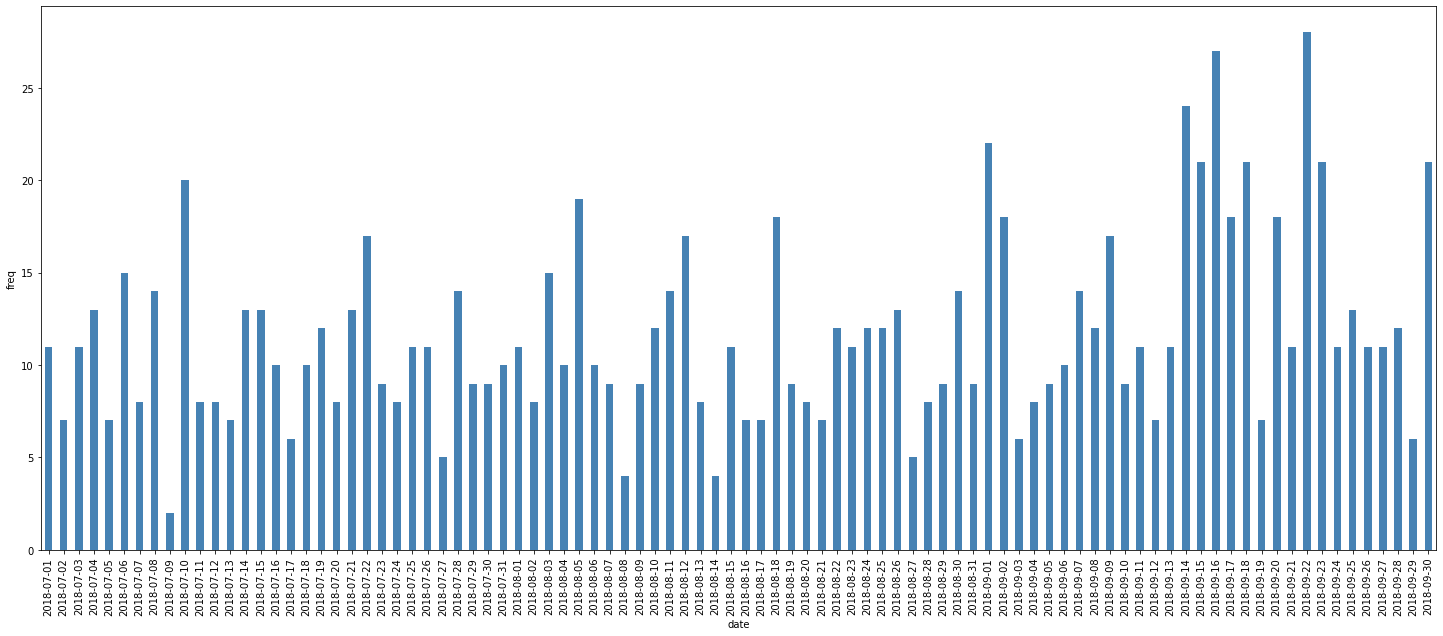

In [146]:
b = df.groupby(['date']).size().plot(kind='bar', color='steelblue', figsize = (25,10), ylabel='freq')

Berdasarkan hasil diatas terlihat bahwa tanggal terbanyak orderan di tanggal 22 September 2018

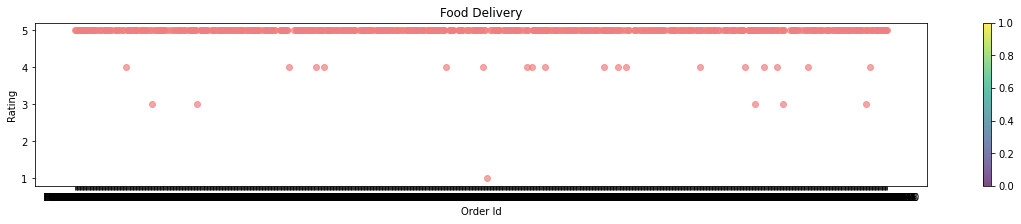

In [154]:
#Membuat scatter plot berdasarkan order id dengan rating
plt.figure(figsize=(20,3))

plt.scatter(x=df['order_id'],y=df['rating'], alpha=0.7,cmap='coolwarm',color='lightcoral')

plt.xlabel('Order Id')
plt.ylabel('Rating')
plt.title('Food Delivery')
plt.colorbar()
plt.show()

Berdasarkan hasil diatas banyak yang memberikan rating 5